In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sklearn

In [37]:
clean_market_data = pd.read_csv('mega_master_db.csv')

C:\Users\dgnic\AppData\Local\Temp\ipykernel_41856\2200086378.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_market_data = pd.read_csv('mega_master_db.csv')


In [38]:
# clean_market_data

### Deal with outliers

In [39]:
# Calculate the z-score for each data point
clean_market_data['z_score'] = np.abs((clean_market_data['converted_price'] - np.mean(clean_market_data['converted_price'])) / np.std(clean_market_data['converted_price']))

clean_market_data
market_data_no_outliers = clean_market_data[clean_market_data['z_score'] < 3]
print(clean_market_data.shape, market_data_no_outliers.shape, f'=> {74911 - 74820} data points removed')

(74784, 24) (74389, 24) => 91 data points removed


In [40]:
market_data_no_outliers

,Unnamed: 0,time_sold,horse_id,genotype,bloodline,breed_type,color,birthday,super_coat,mother,...,place,total_paid,win_rate,overall.first,overall.races,overall.second,overall.third,converted_price,day_sold,z_score
15,15,1.671901e+09,270,Z1,Nakamoto,genesis,Rosy Brown,2019-03-02T09:29:40,False,0.0,...,24.63,1.760085,3.59,34,946,79,120,3046.15000,2022-12-24,2.345064
24,24,1.663184e+09,501,Z2,Nakamoto,genesis,Electric Violet,2019-03-15T12:08:00,False,0.0,...,22.87,0.091390,5.38,12,223,16,23,3093.96000,2022-09-14,2.384025
25,25,1.663610e+09,501,Z2,Nakamoto,genesis,Electric Violet,2019-03-15T12:08:00,False,0.0,...,22.87,0.091390,5.38,12,223,16,23,1801.86500,2022-09-19,1.331101
28,28,1.673439e+09,545,Z2,Nakamoto,genesis,Papaya Whip,2019-03-17T07:05:34,False,0.0,...,20.74,0.733313,2.82,23,815,62,84,1792.11150,2023-01-11,1.323153
37,37,1.655247e+09,644,Z2,Nakamoto,genesis,Brown Sugar,2019-03-20T11:32:57,False,0.0,...,24.37,0.143701,4.30,12,279,25,31,3337.74900,2022-06-14,2.582687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74761,74761,1.673462e+09,519821,Z268,Buterin,cross,Cosmic Cobalt,2023-01-07T19:47:54,False,368861.0,...,0.00,0.000000,0.00,0,8,0,0,1.38913,2023-01-11,0.136101
74762,74762,1.673563e+09,519849,Z17,Buterin,elite,Oval Orchid,2023-01-07T22:27:17,False,473513.0,...,18.18,0.000000,9.09,1,11,1,0,23.34585,2023-01-12,0.118208
74763,74763,1.673312e+09,519892,Z12,Finney,exclusive,Midnight Black,2023-01-08T03:01:52,False,443585.0,...,29.91,0.229800,13.08,14,107,11,7,66.24200,2023-01-09,0.083252
74764,74764,1.673477e+09,519901,Z6,Szabo,exclusive,Dark Moss,2023-01-08T04:15:02,False,513329.0,...,23.19,0.056379,8.70,6,69,6,4,11.20592,2023-01-11,0.128101


## Exploratory Data Analysis

### Price Distribution

<AxesSubplot: xlabel='converted_price'>

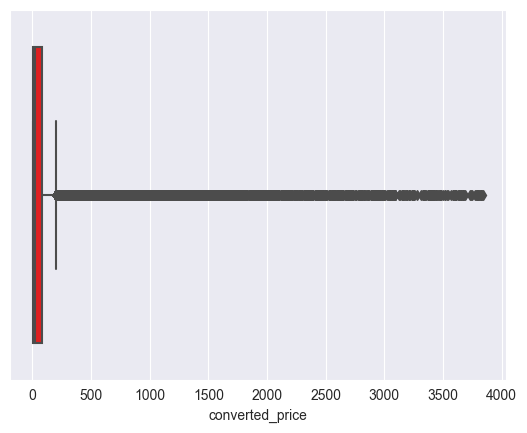

In [41]:
sns.boxplot(data = market_data_no_outliers, x='converted_price', color='red')
# plt.xlim(0,20000)
# plt.ylim(0,80)

The distribution of prices is highly right skewed.

### Win rate vs Price

<AxesSubplot: xlabel='win_rate', ylabel='converted_price'>

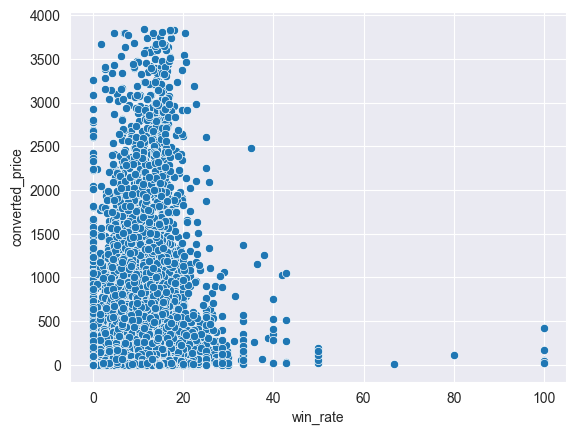

In [42]:
sns.scatterplot(data=market_data_no_outliers, x='win_rate', y='converted_price')

### Different Factors by Breed

In [43]:
by_breed = market_data_no_outliers.groupby('breed_type').mean().reset_index()
by_breed

C:\Users\dgnic\AppData\Local\Temp\ipykernel_41856\2959402490.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_breed = market_data_no_outliers.groupby('breed_type').mean().reset_index()


,breed_type,Unnamed: 0,time_sold,horse_id,mother,father,free_win_rate,paid_win_rate,place,total_paid,win_rate,overall.first,overall.races,overall.second,overall.third,converted_price,z_score
0,cross,51610.575969,1.662909e+09,416312.150826,284935.210108,294491.871742,5.888686,1.907812,19.312311,0.028182,5.618649,8.681341,106.407184,8.510966,8.468373,20.078084,0.125501
1,elite,45156.301463,1.661447e+09,387200.217384,235481.718158,222533.164802,7.178207,3.123271,22.790164,0.066909,6.794897,15.042771,176.305422,14.992857,14.884509,31.889489,0.118140
2,exclusive,35696.286663,1.659331e+09,333594.173334,159520.259636,92669.891201,7.620131,3.718447,24.090492,0.137964,7.192714,23.388437,267.932164,22.976927,22.892314,84.858425,0.121940
3,genesis,2617.133996,1.660587e+09,21897.416488,0.000000,0.000000,7.340878,4.093276,22.616439,0.214878,6.499659,24.660580,287.462137,24.845059,24.577336,539.718844,0.338801
4,legendary,31485.552013,1.658653e+09,298353.971044,14577.697012,12923.873187,7.750761,3.740246,24.599530,0.170139,7.188440,25.386989,294.575179,26.212546,26.362849,189.491619,0.160817
5,pacer,51044.815166,1.661643e+09,415614.001215,259706.924535,313375.999635,2.594986,0.688643,10.066278,0.009770,2.519611,2.480860,53.962571,2.924778,3.225665,12.139662,0.128471


Text(0.5, 1.0, 'Mean Win Rate by Breed Type')

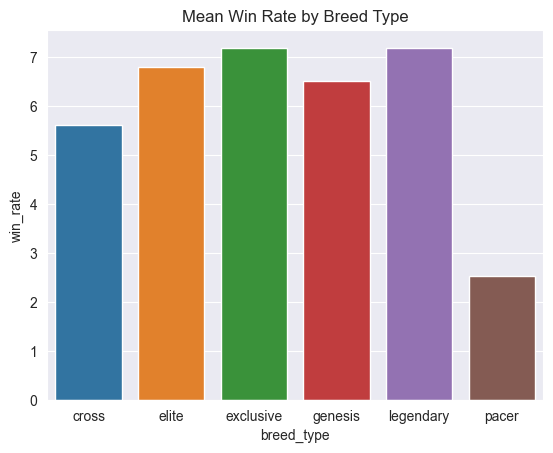

In [44]:
sns.barplot(data=by_breed, x='breed_type', y='win_rate')
plt.title('Mean Win Rate by Breed Type')

Text(0.5, 1.0, 'Mean Number of 1st Place Finishes by Breed')

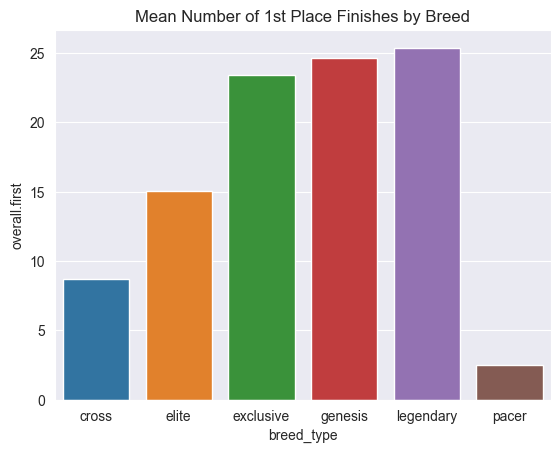

In [45]:
sns.barplot(data=by_breed, x='breed_type', y='overall.first')
plt.title('Mean Number of 1st Place Finishes by Breed')

<AxesSubplot: xlabel='breed_type', ylabel='converted_price'>

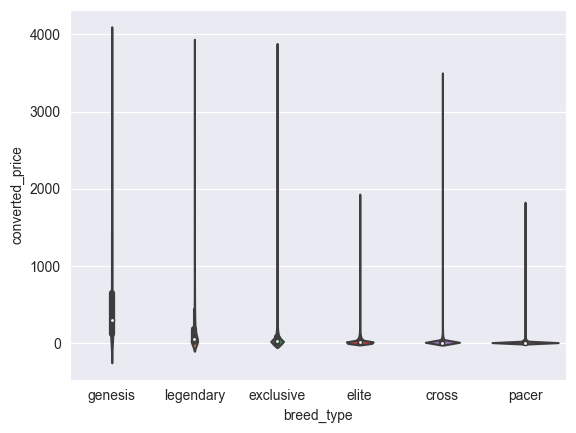

In [46]:
sns.violinplot(data=market_data_no_outliers, x='breed_type', y='converted_price')

### Different Factors by Bloodline

In [47]:
by_blood = market_data_no_outliers.groupby('bloodline').mean().reset_index()
by_blood

C:\Users\dgnic\AppData\Local\Temp\ipykernel_41856\880782964.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_blood = market_data_no_outliers.groupby('bloodline').mean().reset_index()


,bloodline,Unnamed: 0,time_sold,horse_id,mother,father,free_win_rate,paid_win_rate,place,total_paid,win_rate,overall.first,overall.races,overall.second,overall.third,converted_price,z_score
0,Buterin,36920.016083,1.660381e+09,323918.589748,160738.338202,156802.056951,5.469681,2.402422,17.643384,0.057995,5.198868,13.491651,159.261847,12.583198,12.205910,47.731050,0.128035
1,Finney,36214.080109,1.659886e+09,328330.938158,146234.212673,113266.571546,7.317045,3.563324,23.641300,0.113920,6.937956,21.020360,243.566980,20.671128,20.600152,88.403112,0.139460
2,Nakamoto,40430.050869,1.660045e+09,358235.076523,136368.416797,108246.232767,8.504209,3.852216,26.919906,0.206905,7.786541,24.973531,294.052688,27.252462,27.954024,241.766624,0.172763
3,Szabo,36872.197717,1.659725e+09,334698.273201,136212.888102,104283.003051,8.073463,3.882477,25.563020,0.156668,7.561329,24.766066,290.052455,25.350359,25.618837,149.367392,0.148827


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Buterin'),
  Text(1, 0, 'Finney'),
  Text(2, 0, 'Nakamoto'),
  Text(3, 0, 'Szabo')])

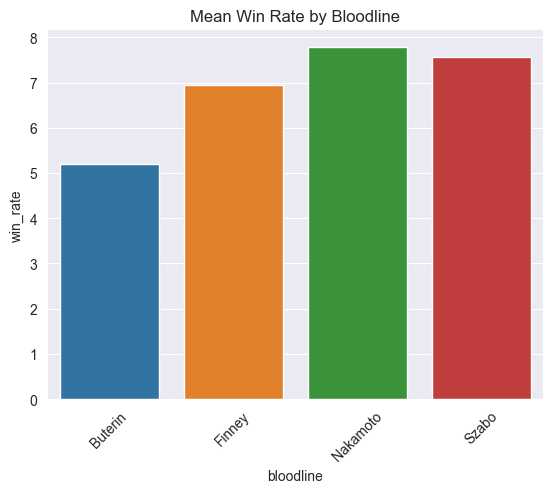

In [48]:
sns.barplot(data=by_blood, x='bloodline', y='win_rate')
plt.title('Mean Win Rate by Bloodline')
plt.xticks(rotation = 45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

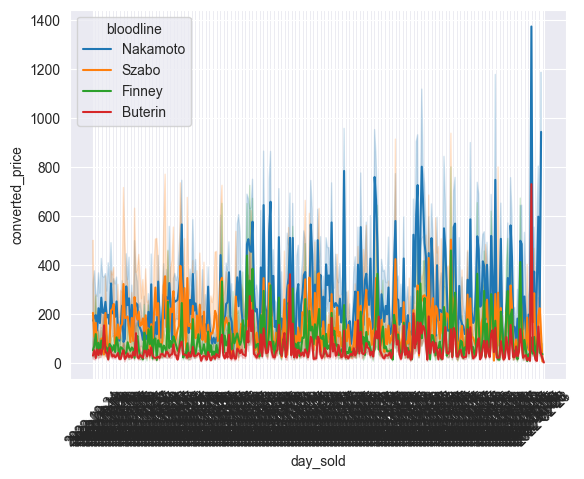

In [49]:
sns.lineplot(data=market_data_no_outliers, x='day_sold', y='converted_price', hue= 'bloodline')
plt.xticks(rotation=45)

## Model Fitting

### Adjust for categorical variables: One-hot encoding

In [50]:
# remove NaNs from the dataset
market_data_no_outliers = market_data_no_outliers[~pd.isna(market_data_no_outliers['converted_price'])]

In [51]:
# clean the dataset to only include desired predictors and separate out the X and y
# X will only have continuous variables for now
X = market_data_no_outliers.drop(columns=['converted_price', 'time_sold','horse_id','birthday', 'horse_id', 'mother', 'father', 'z_score', 'day_sold','bloodline', 'breed_type', 'color', 'genotype', 'horse_type', 'super_coat','Unnamed: 0'])

y = market_data_no_outliers.converted_price
X.columns

Index(['free_win_rate', 'paid_win_rate', 'place', 'total_paid', 'win_rate',
       'overall.first', 'overall.races', 'overall.second', 'overall.third'],
      dtype='object')

In [52]:
# # following accredited to ChatGPT
# from sklearn.preprocessing import OneHotEncoder
#
# # list of categorical variables:
# cat_vars = [ 'breed_type','bloodline',  'genotype', 'horse_type', 'super_coat']
#
# # one-hot encode all cat_vars
# encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#
# print(f'shape before one_hot: {X.shape}')
# for var in cat_vars:
#     # print(f'Overall df: {X.shape}')
#     # One-hot encode the categorical variable
#     categorical_variable_encoded = encoder.fit_transform(market_data_no_outliers[var].values.reshape(-1,1))
#
#     # Convert the encoded variable to a DataFrame
#     categorical_variable_encoded = pd.DataFrame(categorical_variable_encoded, columns=encoder.get_feature_names_out([var]))
#     # print(f'{var}:{categorical_variable_encoded.shape}')
#
#     # Concatenate the encoded variable with the original data
#     X = pd.concat([X, categorical_variable_encoded], axis=1)
# X.fillna(0, inplace=True)
# X = X[:74389]
# print(X.shape, y.shape)
# # X.tail(10)

### Select Model Hyperparameters

In [53]:
# following accredited to ChatGPT

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define the model
model = LinearRegression()

# Define the parameter grid
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}

# Create the grid search object
grid = GridSearchCV(model, param_grid, cv=5, return_train_score=True)


# Fit the grid search to the data
grid.fit(X, y)

# Print the best parameters and score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
print("Best estimator: ", grid.best_estimator_)
# print(f"{len(grid.feature_names_in_)} features selected out of {len(X.columns)}")
# print('Feature names:',grid.feature_names_in_)

Best parameters:  {'fit_intercept': True, 'positive': False}
Best score:  0.2065971482329331
Best estimator:  LinearRegression()


### Test out different feature selection methods

#### Split data into test and train sets

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=156,
                                   test_size=0.2,
                                   shuffle=True)

#### LassoCV
'This method works well with linear models and can be used to select both continuous and categorical predictors, it's particularly useful when there are a large number of predictors in the dataset and the goal is to select a subset of the most relevant features.' - ChatGPT

In [55]:
# fit model using LassoCV for feature selection
from sklearn.linear_model import LassoCV

# Create an instance of LassoCV
lasso = LassoCV(cv=5)

# Fit the LassoCV model to the data
lasso.fit(X_train, y_train)

#  holdout scoring
result = lasso.score(X_test, y_test)
print("Holdout R2: %.2f%%" % (result*100.0))

# Get the selected features
selected_features = X.columns[lasso.coef_ != 0]
print(f'{len(selected_features)} features selected out of {len(X.columns)}: {", ".join(selected_features)}')

# get lasso score
# score = lasso.score(X, y)
# print(f'Model score is: {score}')



Holdout R2: 19.31%
7 features selected out of 9: free_win_rate, paid_win_rate, place, overall.first, overall.races, overall.second, overall.third


In [56]:
# Get a single data point from the DataFrame
data_point = X.iloc[15,:]
print(data_point)

# Make a prediction for the data point
prediction = lasso.predict(data_point.values.reshape(1, -1))
print(prediction)
X

free_win_rate       7.070000
paid_win_rate       0.000000
place              34.630000
total_paid          0.087705
win_rate            6.830000
overall.first      14.000000
overall.races     205.000000
overall.second     19.000000
overall.third      38.000000
Name: 62, dtype: float64
[204.83948789]


C:\Users\dgnic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


,free_win_rate,paid_win_rate,place,total_paid,win_rate,overall.first,overall.races,overall.second,overall.third
15,6.02,1.25,24.63,1.760085,3.59,34,946,79,120
24,5.71,0.00,22.87,0.091390,5.38,12,223,16,23
25,5.71,0.00,22.87,0.091390,5.38,12,223,16,23
28,3.49,0.94,20.74,0.733313,2.82,23,815,62,84
37,4.91,1.82,24.37,0.143701,4.30,12,279,25,31
...,...,...,...,...,...,...,...,...,...
74761,0.00,0.00,0.00,0.000000,0.00,0,8,0,0
74762,10.00,0.00,18.18,0.000000,9.09,1,11,1,0
74763,7.32,16.67,29.91,0.229800,13.08,14,107,11,7
74764,11.76,5.71,23.19,0.056379,8.70,6,69,6,4


In [57]:
# scoring with k-fold validation

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
results_kfold = sklearn.model_selection.cross_val_score(lasso, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 21.05%


In [58]:
from meta_data_query_and_loop_script import get_horse_data
# data_point = X.iloc[5]
# print(data_point.keys())
horse_id = 8919

if horse_id in clean_market_data['horse_id'].values:
    horse_to_predict = clean_market_data[clean_market_data['horse_id']== horse_id]
    print("was in database")
else:
    horse_to_predict = get_horse_data(horse_id)
categories = ['free_win_rate', 'paid_win_rate', 'place','total_paid', 'win_rate', 'overall.first', 'overall.races', 'overall.second', 'overall.third']

print(type(X.iloc[5]))
print(type(horse_to_predict))
horse_to_predict = horse_to_predict.filter(categories)
horse_to_predict = horse_to_predict.values.reshape(1,-1)
prediction_test = lasso.predict(horse_to_predict)
print(prediction_test)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
[671.22586348]


C:\Users\dgnic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
